# AdaBoost Tutorial

## Data Set Characteristics:

### Number of Instances
150 (50 in each of three classes)

### Number of Attributes
4 numeric, predictive attributes and the class

### Attribute Information
sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

### class:
Iris-Setosa

Iris-Versicolour

Iris-Virginica

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
Y = iris.target
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

## Classification using AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier() 

### Evaluating performance of the Ensemble

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=val, n_jobs=-1)
print('Accuracy= %.3f  stdev %.3f' % (np.mean(scores), np.std(scores)))

Accuracy= 0.947  stdev 0.056


In [71]:
clf = clf.fit(X,Y)
print(len(clf.estimators_))

50


C:\Users\Soumya\AppData\Local\Temp/ipykernel_12004/4171956201.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,5))


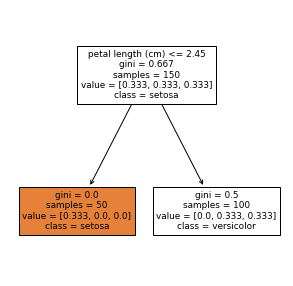

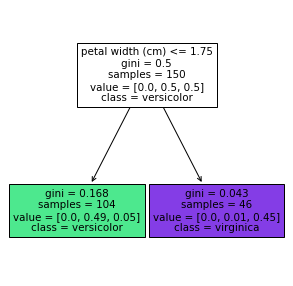

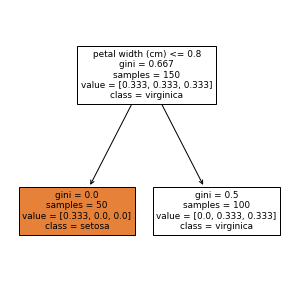

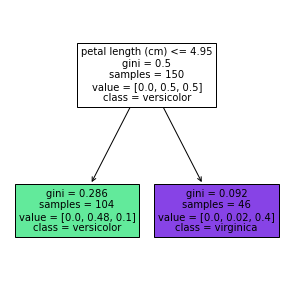

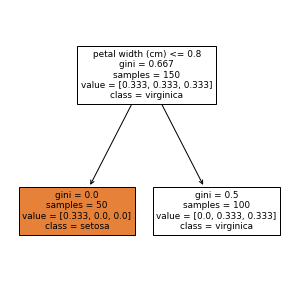

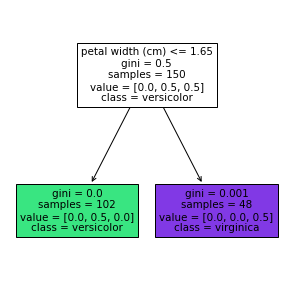

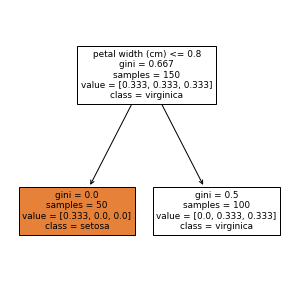

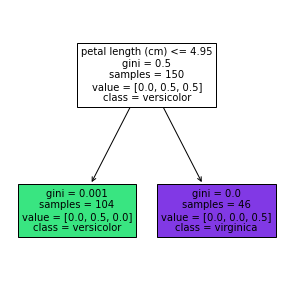

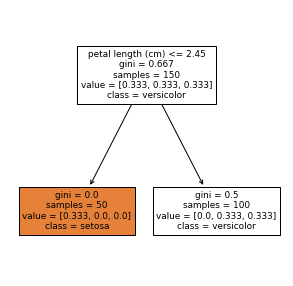

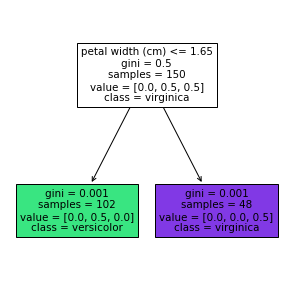

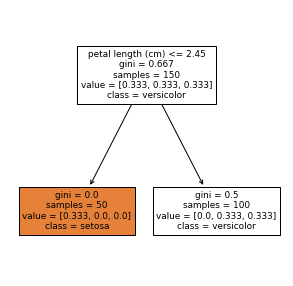

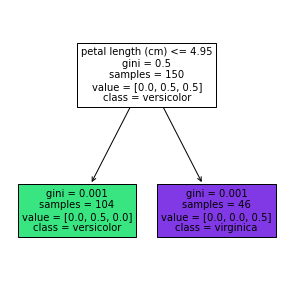

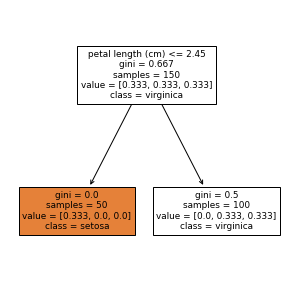

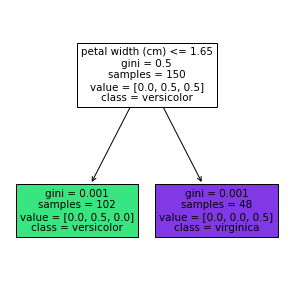

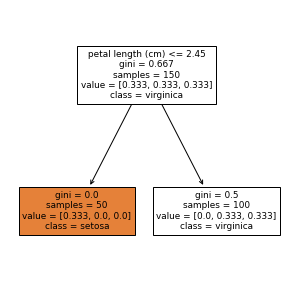

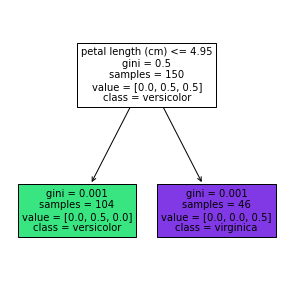

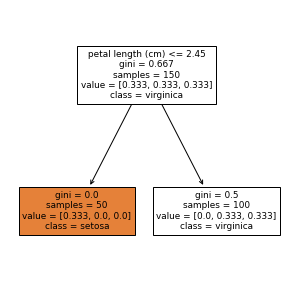

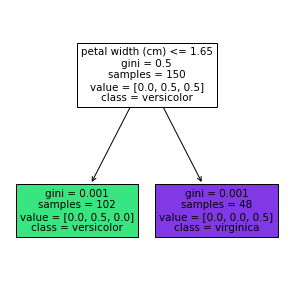

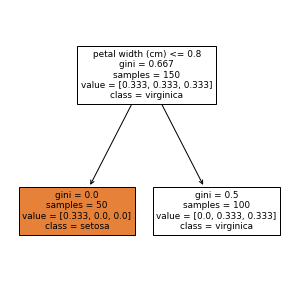

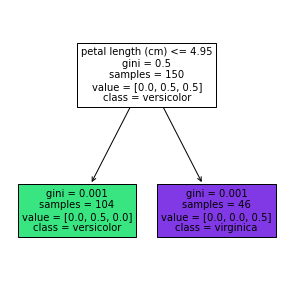

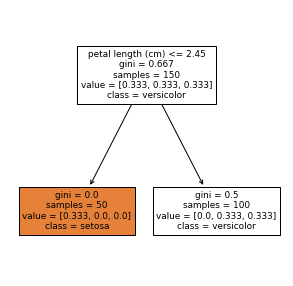

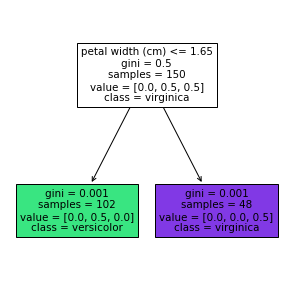

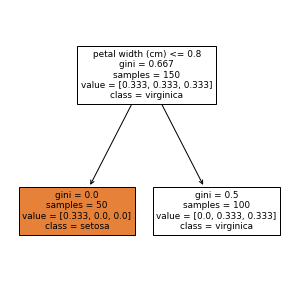

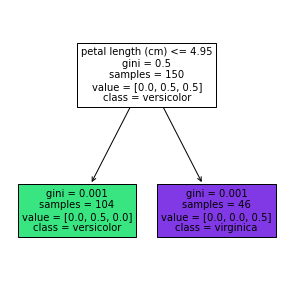

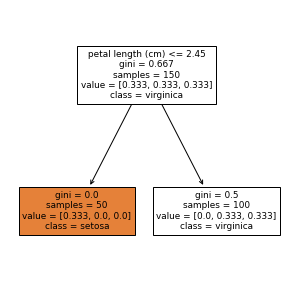

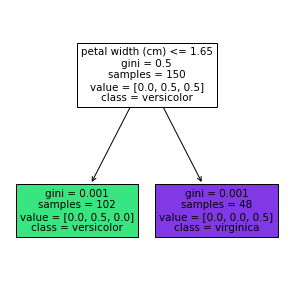

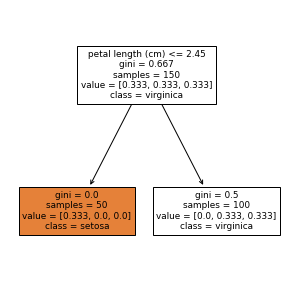

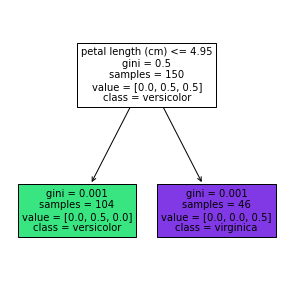

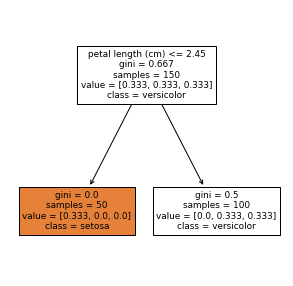

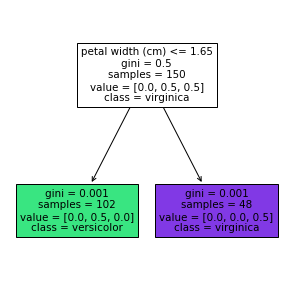

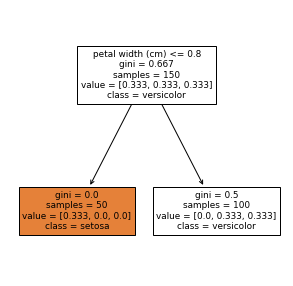

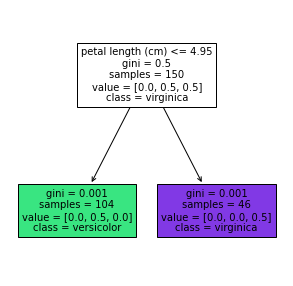

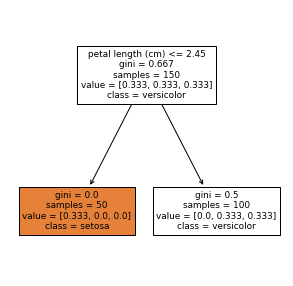

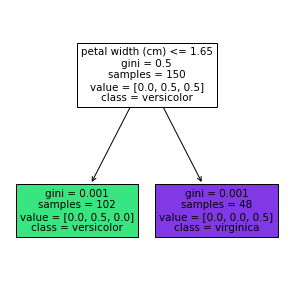

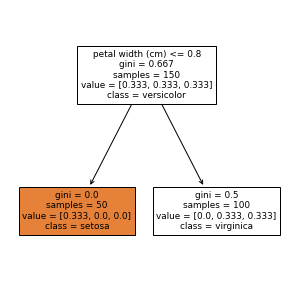

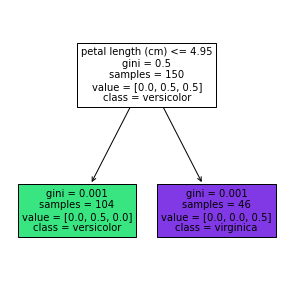

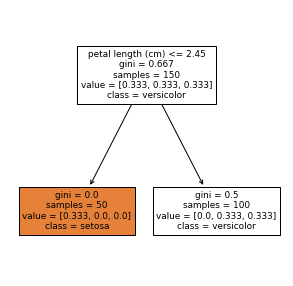

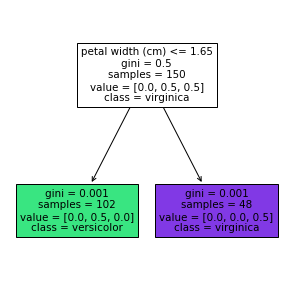

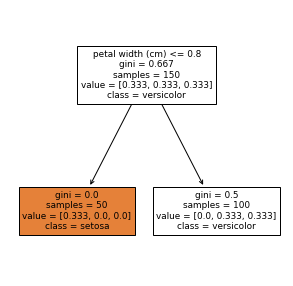

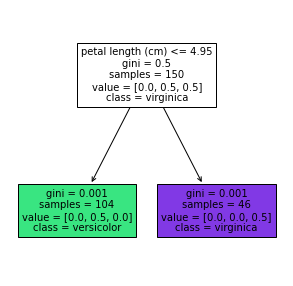

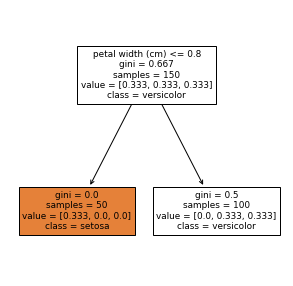

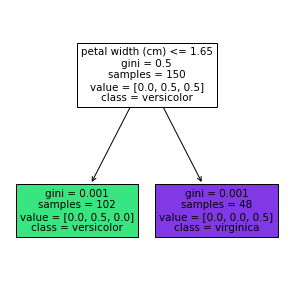

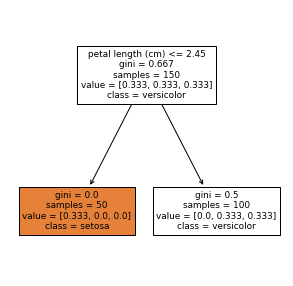

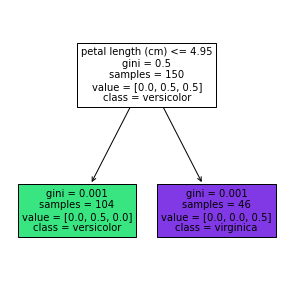

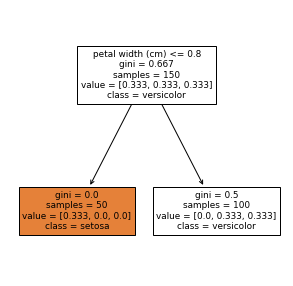

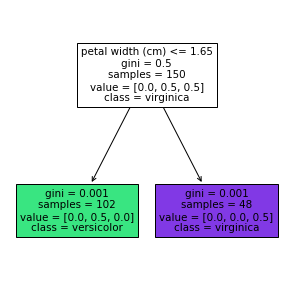

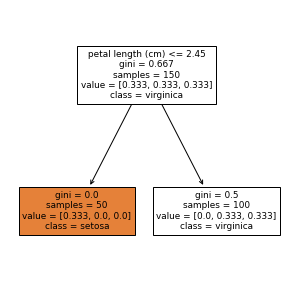

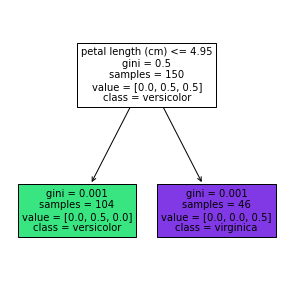

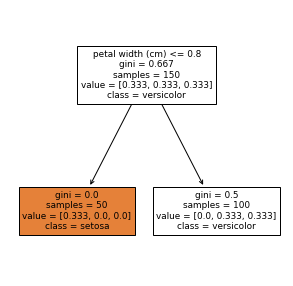

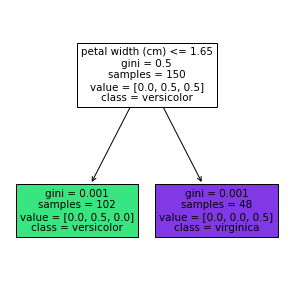

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
iris = load_iris()
for i in range(len(clf.estimators_)):
    fig = plt.figure(figsize=(5,5))
    _ = tree.plot_tree(clf.estimators_[i],feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

## Regression using AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
rgr = AdaBoostRegressor()
rgr = rgr.fit(X,Y)

### Prediction by using the Ensemble

In [74]:
row = [[7.1,4.5,5,5]]
yhat = rgr.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 1


Try different learning_rates/number_of_stumps/depths

In [77]:
from sklearn.tree import DecisionTreeClassifier

def make_models():
    clfs = dict()
    for i in np.arange(10,110,10):
        key = '%.0f' % i 
        #clfs[key] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i))
        clfs[key] = AdaBoostClassifier(n_estimators=i)#learning_rate=i
    return clfs
 
def eval_model(clfs, X, Y):
    val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=val, n_jobs=-1)
    return scores

In [78]:
clfs=make_models()
accs, names = list(), list()
for name, model in clfs.items():
    scores = eval_model(model, X, Y)
    accs.append(scores)
    names.append(name)
    print('%s Accuracy: %.3f stdev: (%.3f)' % (name, np.mean(scores), np.std(scores)))

10 Accuracy: 0.944 stdev: (0.055)
20 Accuracy: 0.940 stdev: (0.063)
30 Accuracy: 0.947 stdev: (0.056)
40 Accuracy: 0.940 stdev: (0.063)
50 Accuracy: 0.947 stdev: (0.056)
60 Accuracy: 0.940 stdev: (0.063)
70 Accuracy: 0.949 stdev: (0.051)
80 Accuracy: 0.942 stdev: (0.059)
90 Accuracy: 0.947 stdev: (0.056)
100 Accuracy: 0.940 stdev: (0.063)


In [ ]:
#Notes
#Weighted Gini-Index can be used to fit each learner
#Weight=learning rate*log(1-e/e)
#SAMME — Stagewise Additive Modeling using a Multi-class Exponential loss function
#Try AdaBoostClassifier(n_estimators=n), base = DecisionTreeClassifier(max_depth=i), models[str(i)] = AdaBoostClassifier(base_estimator=base)